In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Vehicle_Crashes_in_Iowa_20250410.csv')

/var/folders/86/yj7201_91cn2ps6qm_7v91br0000gn/T/ipykernel_89423/4265095426.py:6: DtypeWarning: Columns (17,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Vehicle_Crashes_in_Iowa_20250410.csv')


In [4]:
print(df.head())
print(df.shape)

   Iowa DOT Case Number Law Enforcement Case Number Date of Crash  \
0            2014777106                  2014000077    01/01/2014   
1            2014778620                  2014000141    01/01/2014   
2            2014777807                     2014-81    01/01/2014   
3            2014776993                     14-0007    01/01/2014   
4            2014777420                  2014000047    01/01/2014   

  Month of Crash  Day of Week Time of Crash        Hour  \
0     01-January  4-Wednesday         11:00  1100 Hours   
1     01-January  4-Wednesday         14:11  1400 Hours   
2     01-January  4-Wednesday         04:59  0400 Hours   
3     01-January  4-Wednesday         10:40  1000 Hours   
4     01-January  4-Wednesday         09:00  0900 Hours   

                DOT District        City Name County Name  ...  \
0     District 4 (Southwest)  WEST DES MOINES      DALLAS  ...   
1       District 1 (Central)              NaN      JASPER  ...   
2  District 6 (East Central)    

In [6]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607102 entries, 0 to 607101
Data columns (total 37 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   Iowa DOT Case Number             607102 non-null  int64 
 1   Law Enforcement Case Number      594367 non-null  object
 2   Date of Crash                    607102 non-null  object
 3   Month of Crash                   607102 non-null  object
 4   Day of Week                      607102 non-null  object
 5   Time of Crash                    607102 non-null  object
 6   Hour                             607102 non-null  object
 7   DOT District                     607102 non-null  object
 8   City Name                        412454 non-null  object
 9   County Name                      606075 non-null  object
 10  Route with System                544453 non-null  object
 11  Location Description             605518 non-null  object
 12  First Harmful Ev

In [8]:
print(df.describe(include='all'))

        Iowa DOT Case Number Law Enforcement Case Number Date of Crash  \
count           6.071020e+05                      594367        607102   
unique                   NaN                      554122          4098   
top                      NaN                           1    11/15/2014   
freq                     NaN                          26           623   
mean            1.699785e+10                         NaN           NaN   
std             6.928259e+09                         NaN           NaN   
min             2.014777e+09                         NaN           NaN   
25%             2.016095e+10                         NaN           NaN   
50%             2.019112e+10                         NaN           NaN   
75%             2.022130e+10                         NaN           NaN   
max             2.025147e+10                         NaN           NaN   

       Month of Crash Day of Week Time of Crash        Hour  \
count          607102      607102        607102 

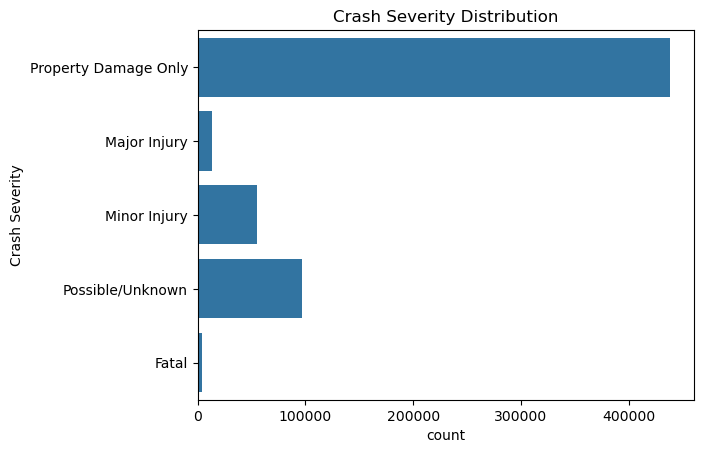

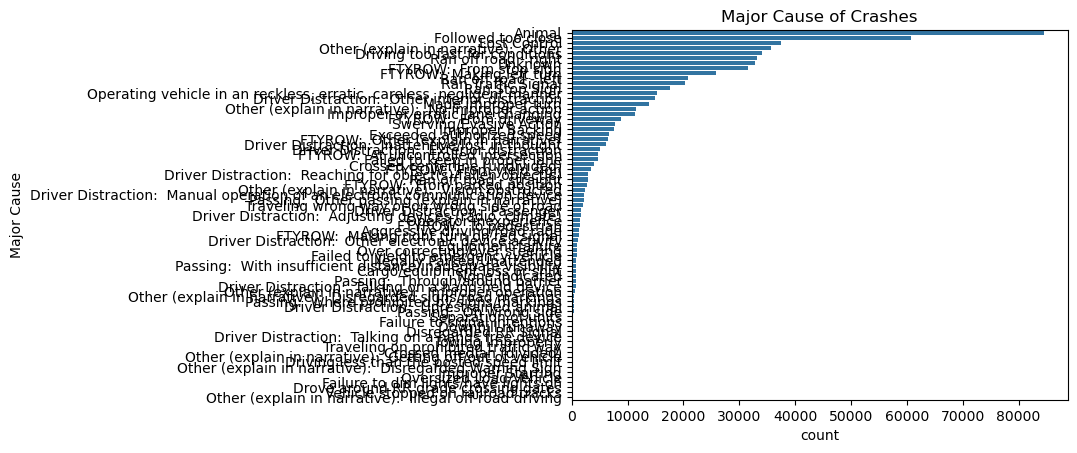

In [10]:
#Visualizes the most common crash severities and causes.
# Crash Severity distribution
sns.countplot(y='Crash Severity', data=df)
plt.title('Crash Severity Distribution')
plt.show()

# Major Cause distribution
sns.countplot(y='Major Cause', data=df, order=df['Major Cause'].value_counts().index)
plt.title('Major Cause of Crashes')
plt.show()

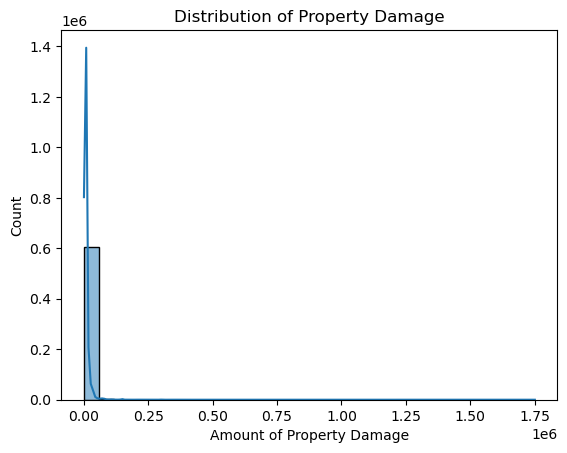

In [12]:
# Histogram for Amount of Property Damage Shows the spread and skewness of property damage amounts.
sns.histplot(df['Amount of Property Damage'].dropna(), bins=30, kde=True)
plt.title('Distribution of Property Damage')
plt.show()

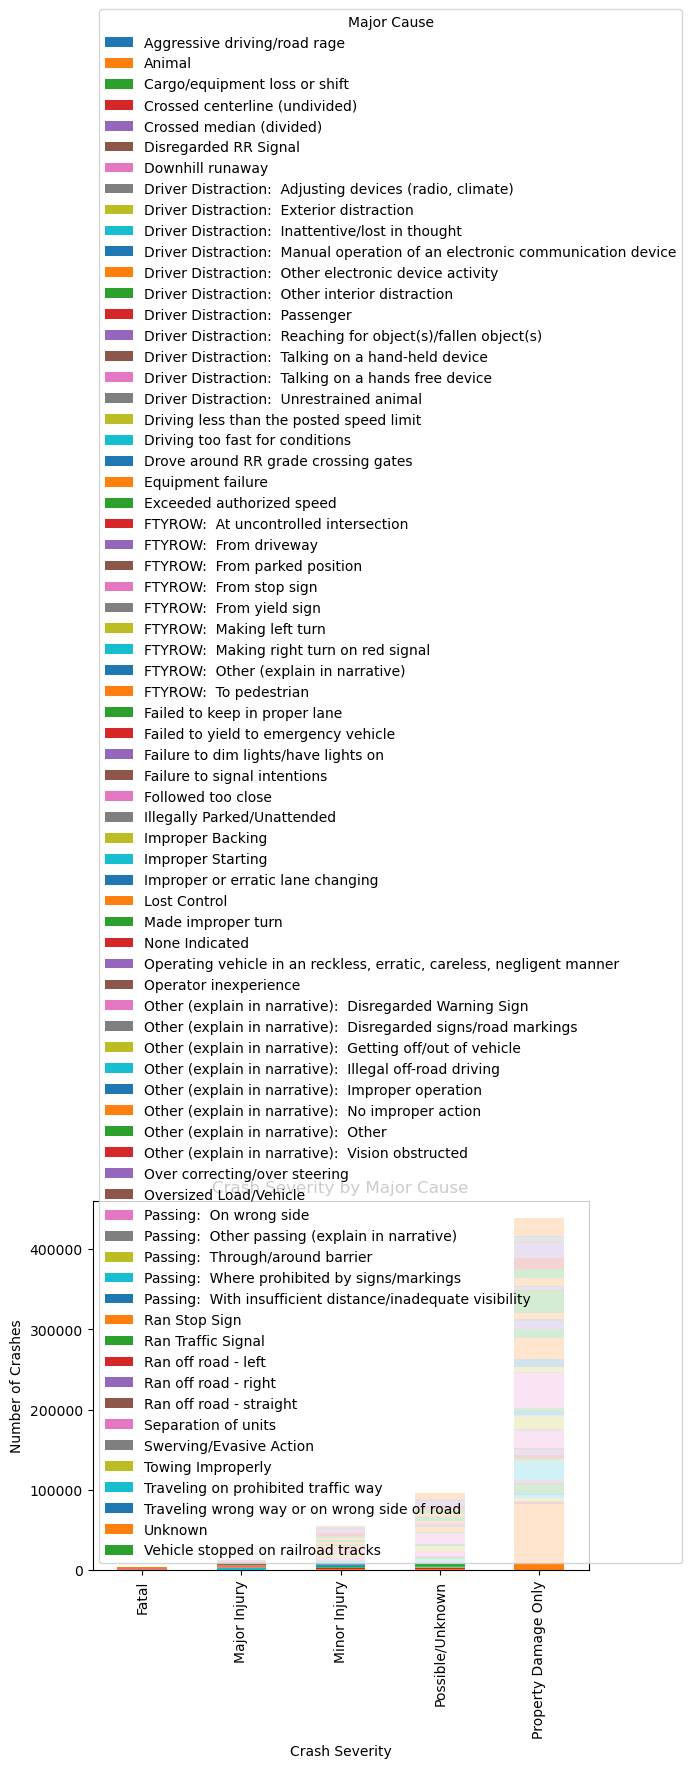

In [14]:
#Reveals which causes are linked to more severe crashes.
pd.crosstab(df['Crash Severity'], df['Major Cause']).plot(kind='bar', stacked=True)
plt.title('Crash Severity by Major Cause')
plt.ylabel('Number of Crashes')
plt.show()

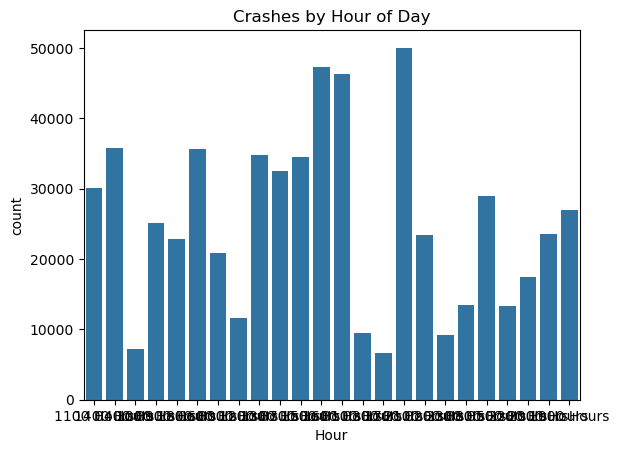

In [16]:
#Identifies peak crash hours.
sns.countplot(x='Hour', data=df)
plt.title('Crashes by Hour of Day')
plt.show()

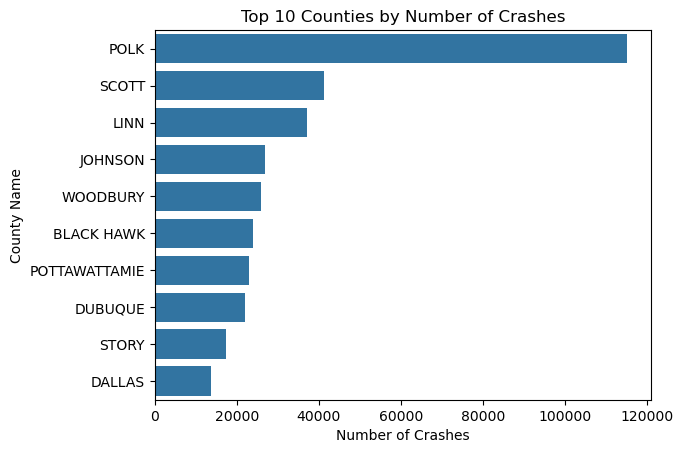

In [18]:
#Shows which counties have the most reported crashes.
# Crashes by County
top_counties = df['County Name'].value_counts().head(10)
sns.barplot(x=top_counties.values, y=top_counties.index)
plt.title('Top 10 Counties by Number of Crashes')
plt.xlabel('Number of Crashes')
plt.show()